# Buffett Indicator
### The Buffett Indicator is the ratio of total United States stock market valuation to GDP.
### The most common measurement of the aggregate value of the US stock market is the Wilshire 5000.

Source:
[FRED](https://fred.stlouisfed.org)

In [10]:
import pandas as pd
import numpy as np
import os
from dotenv import load_dotenv
import fredapi
from fredapi import Fred
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
load_dotenv()

True

In [12]:
api_key = os.getenv('FRED_API_KEY')
fred = Fred(api_key=api_key)

In [13]:
# Pull WIlshire 5000 Price data
wilshire_price = fred.get_series('WILL5000PR', observation_start='1970-01-01')
wilshire_price = pd.DataFrame(wilshire_price, columns={'wilshire5K'})
wilshire_price = wilshire_price.dropna()
wilshire_price.tail()

,wilshire5K
2023-10-05,42814.70
2023-10-06,43324.13
2023-10-09,43601.53
2023-10-10,43863.28
2023-10-11,44032.17


In [14]:
# Pull US GDP data and set frequency data to daily and ffill data
gdp_data = fred.get_series('GDP', observation_start='1970-01-01').asfreq('d').ffill()
gdp_data = pd.DataFrame(gdp_data, columns={'GDP'})
gdp_data.tail()

,GDP
2023-03-28,26813.601
2023-03-29,26813.601
2023-03-30,26813.601
2023-03-31,26813.601
2023-04-01,27063.012


In [15]:
# Concat dataframes to calculate Buffett Indicator
combined = pd.concat([wilshire_price, gdp_data],  axis=1).dropna()
combined['buffett_ind'] = combined['wilshire5K'] / combined['GDP']
combined.tail()

,wilshire5K,GDP,buffett_ind
2023-03-27,40189.93,26813.601,1.498864
2023-03-28,40136.22,26813.601,1.496860
2023-03-29,40709.45,26813.601,1.518239
2023-03-30,40921.86,26813.601,1.526161
2023-03-31,41548.02,26813.601,1.549513


In [16]:
# Calculate Buffet Indicator stats
stats = combined['buffett_ind'].describe()
stats

count    11033.000000
mean         0.881698
std          0.366352
min          0.312246
25%          0.585396
50%          0.857168
75%          1.131131
max          1.992129
Name: buffett_ind, dtype: float64

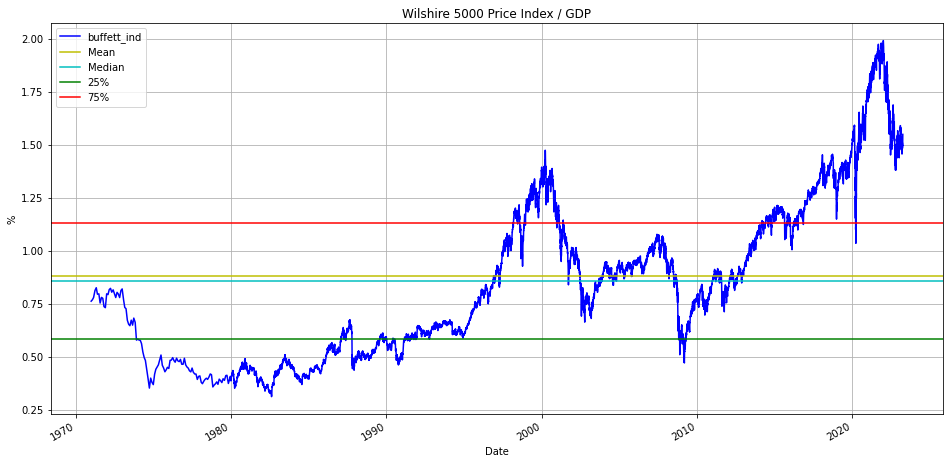

In [17]:
# Plot Buffet Indicator 
combined['buffett_ind'].plot(figsize=(16,8), title='Wilshire 5000 Price Index / GDP', grid=True, xlabel='Date', ylabel= '%', c='b')
plt.axhline(stats['mean'], c='y', label='Mean')
plt.axhline(stats['50%'], label='Median', c='c')
plt.axhline(stats['25%'], label='25%', c='g')
plt.axhline(stats['75%'], label='75%', c='r')
plt.legend()